In [ ]:
pip install requests matplotlib seaborn pandas

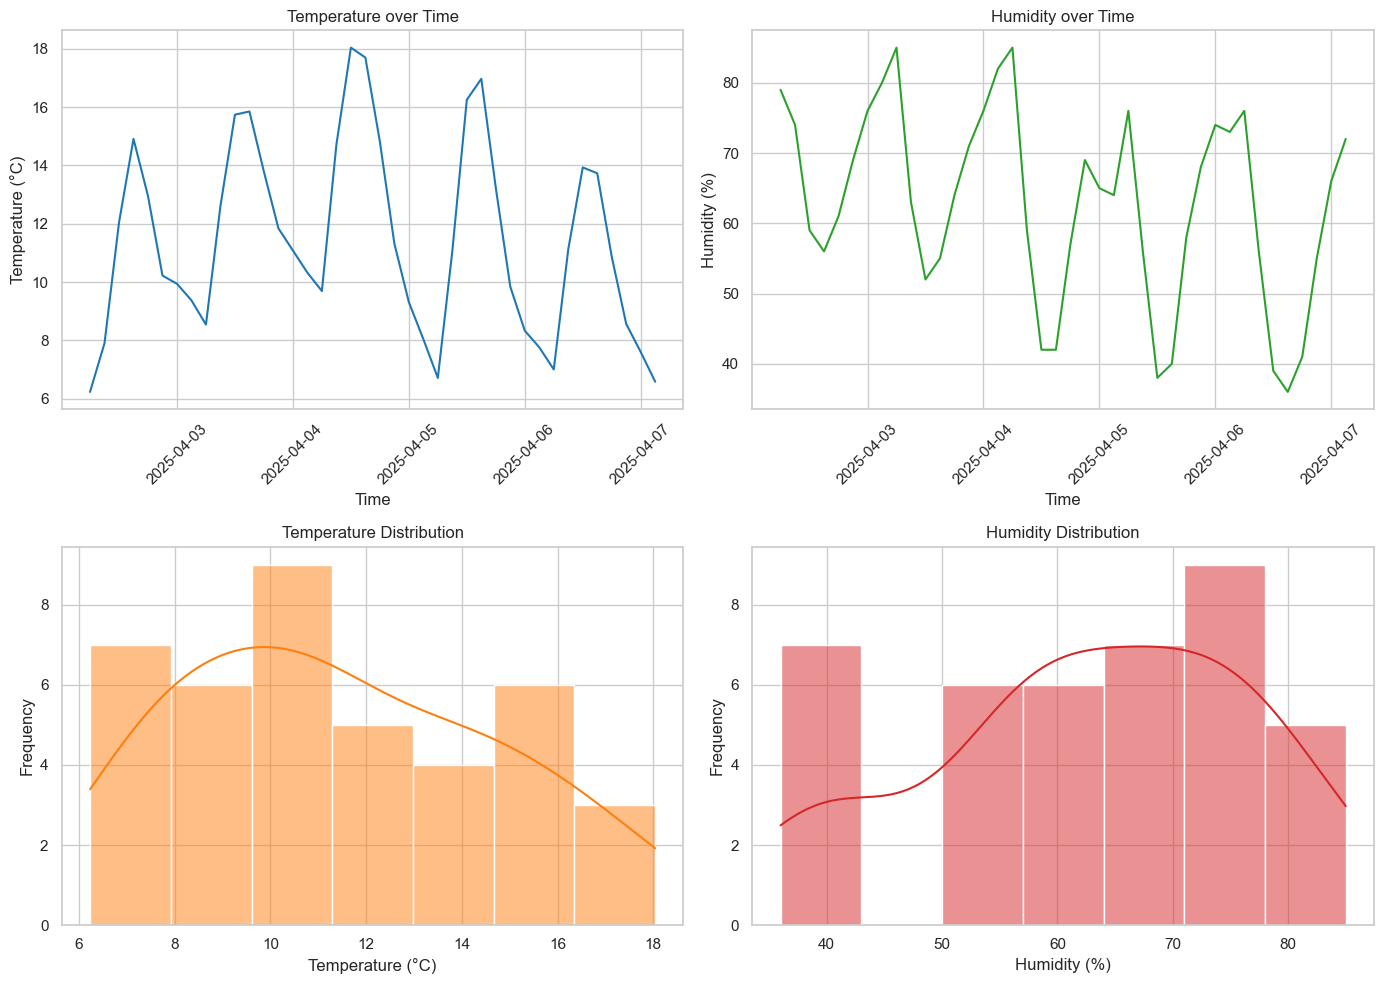

In [3]:
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Function to fetch weather data from OpenWeatherMap API
def get_weather_data(api_key, city, units='metric'):
    url = f'http://api.openweathermap.org/data/2.5/forecast?q={city}&units={units}&appid={api_key}'
    response = requests.get(url)
    
    # Check for successful response
    if response.status_code != 200:
        print(f"Error fetching data for {city}: {response.status_code} - {response.text}")
        return None
    
    return response.json()

# Function to extract and prepare data for visualization
def prepare_data(data):
    timestamps = []
    temperatures = []
    humidity = []
    weather_conditions = []
    
    for entry in data['list']:
        timestamps.append(entry['dt_txt'])
        temperatures.append(entry['main']['temp'])
        humidity.append(entry['main']['humidity'])
        weather_conditions.append(entry['weather'][0]['description'])
    
    # Create a DataFrame from the extracted data
    df = pd.DataFrame({
        'Timestamp': pd.to_datetime(timestamps),
        'Temperature': temperatures,
        'Humidity': humidity,
        'Weather': weather_conditions
    })
    
    return df

# Function to plot visualizations
def plot_visualizations(df):
    # Set Seaborn style
    sns.set(style="whitegrid")
    
    # Create a figure and axis for the dashboard
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Plot Temperature over Time
    axes[0, 0].plot(df['Timestamp'], df['Temperature'], color='tab:blue')
    axes[0, 0].set_title('Temperature over Time')
    axes[0, 0].set_xlabel('Time')
    axes[0, 0].set_ylabel('Temperature (°C)')
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # Plot Humidity over Time
    axes[0, 1].plot(df['Timestamp'], df['Humidity'], color='tab:green')
    axes[0, 1].set_title('Humidity over Time')
    axes[0, 1].set_xlabel('Time')
    axes[0, 1].set_ylabel('Humidity (%)')
    axes[0, 1].tick_params(axis='x', rotation=45)
    
    # Plot Distribution of Temperatures
    sns.histplot(df['Temperature'], kde=True, ax=axes[1, 0], color='tab:orange')
    axes[1, 0].set_title('Temperature Distribution')
    axes[1, 0].set_xlabel('Temperature (°C)')
    axes[1, 0].set_ylabel('Frequency')
    
    # Plot Distribution of Humidity
    sns.histplot(df['Humidity'], kde=True, ax=axes[1, 1], color='tab:red')
    axes[1, 1].set_title('Humidity Distribution')
    axes[1, 1].set_xlabel('Humidity (%)')
    axes[1, 1].set_ylabel('Frequency')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

def main():
    api_key = '33518768da4ea5af84d647c93ac430bb'  # Replace with your OpenWeatherMap API Key
    city = 'London'  # Example city
    weather_data = get_weather_data(api_key, city)

    if weather_data:
        df = prepare_data(weather_data)
        plot_visualizations(df)

if __name__ == '__main__':
    main()
